In [6]:
from sympy import init_printing, Symbol,lambdify, symbols, Matrix,Add,simplify
init_printing()
import OneLoopLFVHD as lfvhd

In [7]:
from seesaw_FF import TrianglesOneFermion, TrianglesTwoFermion, Bubbles,DiagramsOneFermionW, DiagramsOneFermionG
from seesaw_FF import g, mW, Uν, Uνc, mn, m, C, Cc, a,b,i,h
from seesaw_FF import j as jj

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from mpmath import *

In [10]:
mp.dps = 100; mp.pretty = True

In [11]:
import numpy as np

In [12]:
from multiprocessing import Pool
#from time import time

In [13]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    return result

## Neutrino oscillation and lepton data

In [14]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [15]:
m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = mpf(str(Nudata.squareDm21.central))*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mpf(str(Nudata.squareDm31.central))*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

In [16]:
from Unu_seesaw import diagonalizationMnu,Mnu
#diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
#    m1,m2,m3,m6/mp.mpf('3.0'),m6/mp.mpf('2.0'),m6)
Mnu1 = lambda m1,m6: Mnu(m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6)
diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
    m1,m2,m3,m6,m6,m6)

## Left Form Factors for Diagrams with One Fermion

In [17]:
ALTriOnes = [
    FF.AL().expand().collect([mn[i]],evaluate=False) for FF in TrianglesOneFermion
]

ALBubOnes = [
    FF.AL().expand().collect([mn[i]],evaluate=False) for FF in Bubbles
]

ARTriOnes = [
    FF.AR().expand().collect([mn[i]],evaluate=False) for FF in TrianglesOneFermion
]

ARBubOnes = [
    FF.AR().expand().collect([mn[i]],evaluate=False) for FF in Bubbles
]

### Separation Terms proportional to 1 and mn[i]**2

In [18]:
#########################################
# Terms proportional to 1
#########################################
ALTriOne1 = [
    AL[1] for AL in ALTriOnes if 1 in AL.keys()
]

ALBubOne1 = [
    AL[1] for AL in ALBubOnes if 1 in AL.keys()
]

ARTriOne1 = [
    AR[1] for AR in ARTriOnes if 1 in AR.keys()
]

ARBubOne1 = [
    AR[1] for AR in ARBubOnes if 1 in AR.keys()
]
################################################
# Terms proportional to mn[i]**2
################################################
ALTriOnemni2 = [
    AL[mn[i]**2] for AL in ALTriOnes if mn[i]**2 in AL.keys()
]

ALBubOnemni2 = [
    AL[mn[i]**2] for AL in ALBubOnes if mn[i]**2 in AL.keys()
]

ARTriOnemni2 = [
    AR[mn[i]**2] for AR in ARTriOnes if mn[i]**2 in AR.keys()
]

ARBubOnemni2 = [
    AR[mn[i]**2] for AR in ARBubOnes if mn[i]**2 in AR.keys()
]


In [19]:
ALOnetot1 = (Add(*ALTriOne1) + Add(*ALBubOne1)).subs(lfvhd.D,4).simplify()
AROnetot1 = (Add(*ARTriOne1) + Add(*ARBubOne1)).subs(lfvhd.D,4).simplify()

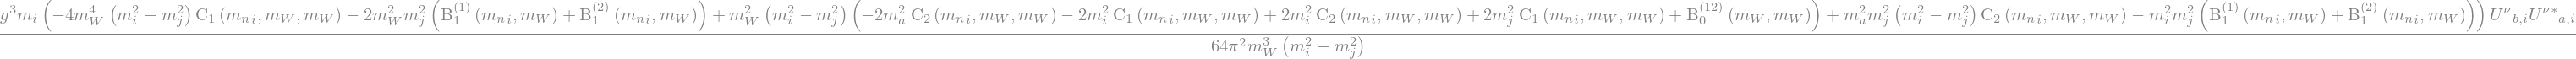

In [20]:
ALOnetot1

In [21]:
#ALOnetot1.subs(cambio_lambdaN)

In [22]:
ALonetot1_dict = ALOnetot1.subs(lfvhd.B12_0(mW,mW),0).expand().collect([mW],evaluate=False)
ALOnemW2 = ALonetot1_dict[mW**2]*mW**2
ALOnemW4 = ALonetot1_dict[mW**4]*mW**4
ALOne_nomW = ALonetot1_dict[1]
ALonetot1_dict.keys()

dict_keys([m_W**4, m_W**2, 1])

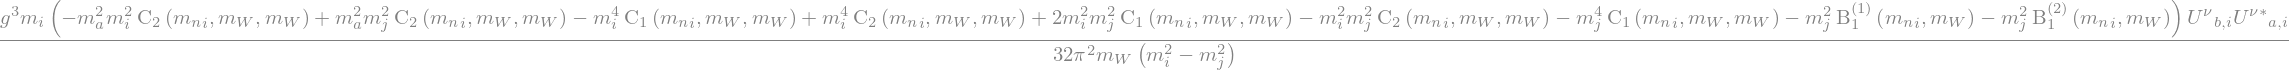

In [23]:
ALOnemW2.simplify()

In [24]:
ARonetot1_dict = AROnetot1.subs(lfvhd.B12_0(mW,mW),0).expand().collect([mW],evaluate=False)
AROnemW2 = ARonetot1_dict[mW**2]*mW**2
AROnemW4 = ARonetot1_dict[mW**4]*mW**4
AROne_nomW = ARonetot1_dict[1]
ARonetot1_dict.keys()

dict_keys([m_W**4, m_W**2, 1])

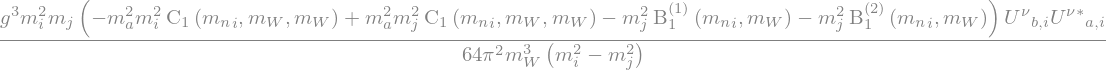

In [25]:
AROne_nomW.simplify()

In [26]:
ALOnetotmni2 = (Add(*ALTriOnemni2) + Add(*ALBubOnemni2)).subs(lfvhd.D,4).simplify()*mn[i]**2
AROnetotmni2 = (Add(*ARTriOnemni2) + Add(*ARBubOnemni2)).subs(lfvhd.D,4).simplify()*mn[i]**2


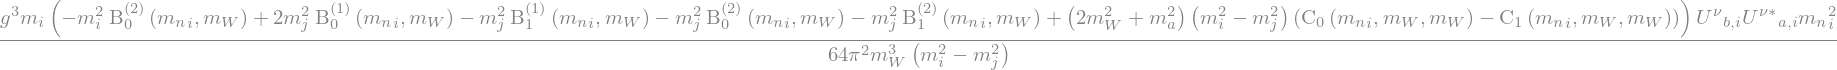

In [27]:

ALOnetotmni2.expand().collect(TrianglesOneFermion[0].Cs,simplify).simplify()

## Form Factors for Diagrams with Two Fermion

In [28]:
ALTriTwos = Add(*[
    FF.AL().subs(lfvhd.D,4) for FF in TrianglesTwoFermion
])

ARTriTwos = Add(*[
    FF.AR().subs(lfvhd.D,4) for FF in TrianglesTwoFermion
])

In [29]:
# ARTriTwos.expand().collect([mn[i],mn[jj]],simplify)

## Lambdify and neutrino generation sum

In [30]:
from OneLoopLFVHD.data import ml

In [31]:
mh,ma,mb = symbols('m_h,m_a,m_b',real=True)
valores ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}
cambios_hab = lambda a,b:{lfvhd.ma:valores[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}

In [32]:
Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

In [33]:
#[AL.keys() for AL in ALTriTwos]
# display([AR.keys() for AR in ARTriTwos])
# AROnetot1.subs(lfvhd.B12_0(mW,mW),0).subs(cambios_hab(2,3)).subs(valores).subs(UnuOne)#.atoms(Symbol)

In [34]:
def sumOne(m6,Aab,a,b): 
    '''
    Function which sums over neutrino generation conidering the structure of Upmns matrix before calculated.
    
    Input
    --------
        m6 (float): the haviet mass
        Aab: funtion asociated to form factor
        a,b (int): indexes of leptons a,b=1,2 or 3
        
    Output
    --------
        out (float): numeric summation of the form factor over the 6 neutrino generations.
    '''
    mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuR
    Unu_dagger = UnuL
    FF = []
    for k in range(1,7):
        #A = Aab(mnk[k-1],Unu[b-1,k-1],conj(Unu[a-1,k-1]))
        A = Aab(mnk[k-1],Unu[b-1,k-1],Unu_dagger[k-1,a-1])
        #print('Ai = ',A)
        FF.append(A)
    out = mp.fsum(FF)
    return out


In [35]:
from OneLoopLFVHD.data import replaceBs, pave_functions # Auxiliary functions

In [36]:
def numeric_sum_diagramsOne(a,b,quirality='L',FFs={'L':ALOnetot1,'R':AROnetot1}):
    '''
    This function create a function which only depends on m6 and represent the sum of all form factors
    associated to diagrams with one fermion in the loop and also considering the 6 neutrino generations.
    
    Input
    ---------
        a,b (int): indexes of leptons, a,b = 1,2 or 3
        quirality (string): represents the chirality of the diagrams, it can be L or R:
        
    Output:
        sum_over_index_i (function): returns the function which represent the sum of all diagrams and 
        over the neutrino index i. This function only depends on m6.
    '''
    
    if quirality=='L':
        x = FFs['L']
    elif quirality=='R':
        x = FFs['R']
    else:
        raise ValueError('quirality must be L or R')
    x = x.subs(lfvhd.B12_0(mW,mW),0).subs(cambios_hab(a,b)).subs(valores).subs(UnuOne)
    FF_lamb = lambdify([mni,Ubi,Ucai],# depends on three parameters
                 replaceBs(x), #
                 modules=[pave_functions(valores[mh],a,b,lib='mpmath'),'mpmath']
                        )
    def sum_over_index_i(m6):
        FF_sum_over_i = sumOne(m6,FF_lamb,a,b) # sum over neutrino generations
        return FF_sum_over_i
    return sum_over_index_i

    # return lambda mni: FF_lamb(mni,1,1)

In [37]:
def ALOneTot23_1(m6):
    return numeric_sum_diagramsOne(2,3,quirality='L')(m6)
def AROneTot23_1(m6):
    return numeric_sum_diagramsOne(2,3,quirality='R')(m6)

def ALOneTot23_mni2(m6):
    return numeric_sum_diagramsOne(2,3,quirality='L',
                         FFs={'L':ALOnetotmni2,'R':AROnetotmni2})(m6)
def AROneTot23_mni2(m6):
    return numeric_sum_diagramsOne(2,3,quirality='R',
                         FFs={'L':ALOnetotmni2,'R':AROnetotmni2})(m6)

def ALOneTot23(m6):
    AL_1 = ALOneTot23_1(m6)
    AL_mni2 = ALOneTot23_mni2(m6)
    return AL_1 + AL_mni2
def AROneTot23(m6):
    AR_1 = AROneTot23_1(m6)
    AR_mni2 = AROneTot23_mni2(m6)
    return AR_1 + AR_mni2

def ALOneTot23_mW0(m6):
    return numeric_sum_diagramsOne(2,3,quirality='L',
                         FFs={'L':ALOne_nomW,'R':AROne_nomW})(m6)
def AROneTot23_mW0(m6):
    return numeric_sum_diagramsOne(2,3,quirality='R',
                         FFs={'L':ALOne_nomW,'R':AROne_nomW})(m6)

def ALOneTot23_mW2(m6):
    return numeric_sum_diagramsOne(2,3,quirality='L',
                         FFs={'L':ALOnemW2,'R':AROnemW2})(m6)
def AROneTot23_mW2(m6):
    return numeric_sum_diagramsOne(2,3,quirality='R',
                         FFs={'L':ALOnemW2,'R':AROnemW2})(m6)

def ALOneTot23_mW4(m6):
    return numeric_sum_diagramsOne(2,3,quirality='L',
                         FFs={'L':ALOnemW4,'R':AROnemW4})(m6)
def AROneTot23_mW4(m6):
    return numeric_sum_diagramsOne(2,3,quirality='R',
                         FFs={'L':ALOnemW4,'R':AROnemW4})(m6)
######################################################################
######################################################################
def ALOneTot13_1(m6):
    return numeric_sum_diagramsOne(1,3,quirality='L')(m6)
def AROneTot13_1(m6):
    return numeric_sum_diagramsOne(1,3,quirality='R')(m6)

def ALOneTot13_mni2(m6):
    return numeric_sum_diagramsOne(1,3,quirality='L',
                         FFs={'L':ALOnetotmni2,'R':AROnetotmni2})(m6)
def AROneTot13_mni2(m6):
    return numeric_sum_diagramsOne(1,3,quirality='R',
                         FFs={'L':ALOnetotmni2,'R':AROnetotmni2})(m6)

def ALOneTot13(m6):
    AL_1 = ALOneTot13_1(m6)
    AL_mni2 = ALOneTot13_mni2(m6)
    return AL_1 + AL_mni2
def AROneTot13(m6):
    AR_1 = AROneTot13_1(m6)
    AR_mni2 = AROneTot13_mni2(m6)
    return AR_1 + AR_mni2

def ALOneTot13_mW0(m6):
    return numeric_sum_diagramsOne(1,3,quirality='L',
                         FFs={'L':ALOne_nomW,'R':AROne_nomW})(m6)
def AROneTot13_mW0(m6):
    return numeric_sum_diagramsOne(1,3,quirality='R',
                         FFs={'L':ALOne_nomW,'R':AROne_nomW})(m6)

def ALOneTot13_mW2(m6):
    return numeric_sum_diagramsOne(1,3,quirality='L',
                         FFs={'L':ALOnemW2,'R':AROnemW2})(m6)
def AROneTot13_mW2(m6):
    return numeric_sum_diagramsOne(1,3,quirality='R',
                         FFs={'L':ALOnemW2,'R':AROnemW2})(m6)
                        
def ALOneTot13_mW4(m6):
    return numeric_sum_diagramsOne(1,3,quirality='L',
                         FFs={'L':ALOnemW4,'R':AROnemW4})(m6)
def AROneTot13_mW4(m6):
    return numeric_sum_diagramsOne(1,3,quirality='R',
                         FFs={'L':ALOnemW4,'R':AROnemW4})(m6)
######################################################################
######################################################################
def ALOneTot12_1(m6):
    return numeric_sum_diagramsOne(1,2,quirality='L')(m6)
def AROneTot12_1(m6):
    return numeric_sum_diagramsOne(1,2,quirality='R')(m6)

def ALOneTot12_mni2(m6):
    return numeric_sum_diagramsOne(1,2,quirality='L',
                         FFs={'L':ALOnetotmni2,'R':AROnetotmni2})(m6)
def AROneTot12_mni2(m6):
    return numeric_sum_diagramsOne(1,2,quirality='R',
                         FFs={'L':ALOnetotmni2,'R':AROnetotmni2})(m6)

def ALOneTot12(m6):
    AL_1 = ALOneTot12_1(m6)
    AL_mni2 = ALOneTot12_mni2(m6)
    return AL_1 + AL_mni2
def AROneTot12(m6):
    AR_1 = AROneTot12_1(m6)
    AR_mni2 = AROneTot12_mni2(m6)
    return AR_1 + AR_mni2

def ALOneTot12_mW0(m6):
    return numeric_sum_diagramsOne(1,2,quirality='L',
                         FFs={'L':ALOne_nomW,'R':AROne_nomW})(m6)
def AROneTot12_mW0(m6):
    return numeric_sum_diagramsOne(1,2,quirality='R',
                         FFs={'L':ALOne_nomW,'R':AROne_nomW})(m6)

def ALOneTot12_mW2(m6):
    return numeric_sum_diagramsOne(1,2,quirality='L',
                         FFs={'L':ALOnemW2,'R':AROnemW2})(m6)
def AROneTot12_mW2(m6):
    return numeric_sum_diagramsOne(1,2,quirality='R',
                         FFs={'L':ALOnemW2,'R':AROnemW2})(m6)

def ALOneTot12_mW4(m6):
    return numeric_sum_diagramsOne(1,2,quirality='L',
                         FFs={'L':ALOnemW4,'R':AROnemW4})(m6)
def AROneTot12_mW4(m6):
    return numeric_sum_diagramsOne(1,2,quirality='R',
                         FFs={'L':ALOnemW4,'R':AROnemW4})(m6)

In [38]:
# ALOneTot23_1(mpf('1e-12')),ALOneTot23_mni2(mpf('1e-12'))
#ALOneTot13_1(mpf('1e-12')),ALOneTot13_mni2(mpf('1e-12'))
#ALOneTot12_1(mpf('1e-12')),ALOneTot12_mni2(mpf('1e-12'))
ALOneTot12_mW0(mpf('1e-12')),ALOneTot12_mW0(mpf('1e-12'))


((4.928483298659439724888020179628247521191898736122158310936539935814595857814067226728077102739335386e-42 - 1.903456377986736917455518416872907660117714137275821686204545240929607523416974605449305571791838215e-116j),
 (4.928483298659439724888020179628247521191898736122158310936539935814595857814067226728077102739335386e-42 - 1.903456377986736917455518416872907660117714137275821686204545240929607523416974605449305571791838215e-116j))

In [39]:
n = 100
expmp = linspace(-1,15,n)
m6np = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [40]:
%%time
##############################################################
##############################################################
YLOne23_1 = speedup_array(ALOneTot23_1,m6np)
YLOne23_mni2 = speedup_array(ALOneTot23_mni2,m6np)
# YLOne23_mW0 = speedup_array(ALOneTot23_mW0,m6np)
# YLOne23_mW2 = speedup_array(ALOneTot23_mW2,m6np)
# YLOne23_mW4 = speedup_array(ALOneTot23_mW4,m6np)


YROne23_1 = speedup_array(AROneTot23_1,m6np)
YROne23_mni2 = speedup_array(AROneTot23_mni2,m6np)
# YROne23_mW0 = speedup_array(AROneTot23_mW0,m6np)
# YROne23_mW2 = speedup_array(AROneTot23_mW2,m6np)
# YROne23_mW4 = speedup_array(AROneTot23_mW4,m6np)
##############################################################
##############################################################
YLOne13_1 = speedup_array(ALOneTot13_1,m6np)
YLOne13_mni2 = speedup_array(ALOneTot13_mni2,m6np)
# YLOne13_mW0 = speedup_array(ALOneTot13_mW0,m6np)
# YLOne13_mW2 = speedup_array(ALOneTot13_mW2,m6np)
# YLOne13_mW4 = speedup_array(ALOneTot13_mW4,m6np)

YROne13_1 = speedup_array(AROneTot13_1,m6np)
YROne13_mni2 = speedup_array(AROneTot13_mni2,m6np)
# YROne13_mW0 = speedup_array(AROneTot13_mW0,m6np)
# YROne13_mW2 = speedup_array(AROneTot13_mW2,m6np)
# YROne13_mW4 = speedup_array(AROneTot13_mW4,m6np)
##############################################################
##############################################################
YLOne12_1 = speedup_array(ALOneTot12_1,m6np)
YLOne12_mni2 = speedup_array(ALOneTot12_mni2,m6np)
# YLOne12_mW0 = speedup_array(ALOneTot12_mW0,m6np)
# YLOne12_mW2 = speedup_array(ALOneTot12_mW2,m6np)
# YLOne12_mW4 = speedup_array(ALOneTot12_mW4,m6np)

YROne12_1 = speedup_array(AROneTot12_1,m6np)
YROne12_mni2 = speedup_array(AROneTot12_mni2,m6np)
# YROne12_mW0 = speedup_array(AROneTot12_mW0,m6np)
# YROne12_mW2 = speedup_array(AROneTot12_mW2,m6np)
# YROne12_mW4 = speedup_array(AROneTot12_mW4,m6np)

CPU times: user 1.42 s, sys: 717 ms, total: 2.13 s
Wall time: 7min 53s


In [41]:
YLOne23 = YLOne23_1 + YLOne23_mni2
YROne23 = YROne23_1 + YROne23_mni2

YLOne13 = YLOne13_1 + YLOne13_mni2
YROne13 = YROne13_1 + YROne13_mni2

YLOne12 = YLOne12_1 + YLOne12_mni2
YROne12 = YROne12_1 + YROne12_mni2

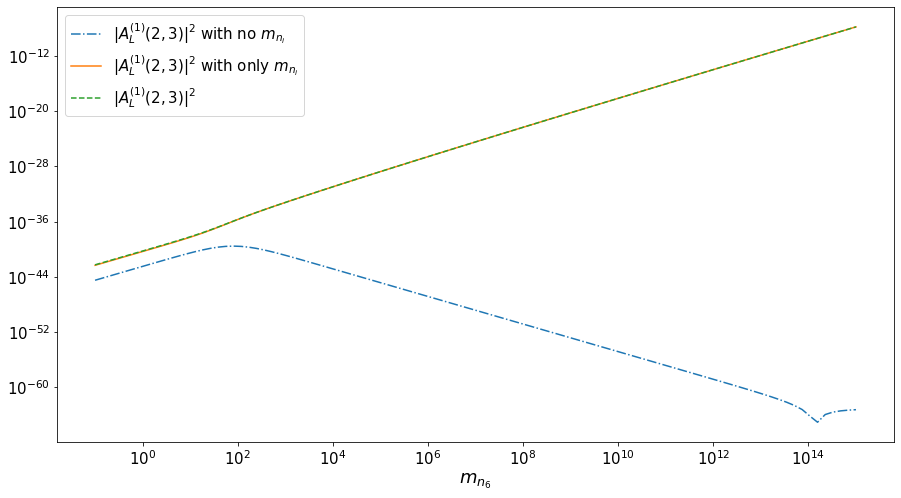

In [42]:
plt.figure(figsize=(15,8))


plt.loglog(np.real(m6np),abs(YLOne23_1)**2,'-.',label='$|A_L^{(1)}(2,3)|^2$ with no $m_{n_i}$')
plt.loglog(np.real(m6np),abs(YLOne23_mni2)**2,'-',
           label='$|A_L^{(1)}(2,3)|^2$ with only $m_{n_i}$')
plt.loglog(np.real(m6np),abs(YLOne23)**2,'--',label='$|A_L^{(1)}(2,3)|^2$')
# plt.loglog(np.real(m6np),abs(YLOne23_mni2 - YLOne23_1),'-.',label='diff')


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.xlabel('$m_{n_6}$',fontsize=18);

In [45]:
# import gc
# gc.collect()

In [42]:
# plt.figure(figsize=(15,8))

# plt.loglog(np.real(m6np),abs(YLOne23_mW0)**2,'-.',label='$|A_L^{(1)}(2,3)|^2$ with no $m_{W}$');
# plt.loglog(np.real(m6np),abs(YLOne23_mW2)**2,'-.',label='$|A_L^{(1)}(2,3)|^2$ with $m_{W}^2$');
# plt.loglog(np.real(m6np),abs(YLOne23_mW4)**2,'-.',label='$|A_L^{(1)}(2,3)|^2$ with $m_{W}^4$');
# plt.loglog(np.real(m6np),abs(YLOne23_1)**2,'-.',label='$|A_L^{(1)}(2,3)|^2$ with no $m_{n_i}$');
# #plt.loglog(np.real(m6np),mpf('1e-12')/m6np**2,'-.',label=r'$\frac{m_\nu}{m_{n_6}^2}$');

# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.legend(fontsize=15)
# plt.xlabel('$m_{n_6}$',fontsize=18);

## Form factor with two fermion in the loop.

In this case we only have 2 diagrams stored in `TrianglesTwoFermion` list. In this case we have two neutrino indexes $i$ and $j$.Then, we have a doble summatory in this case.  First we do an auxiliar simbolic substitutions related to the following code

In [46]:
mnj = symbols('m_{n_j}',positive=True)
Cijs, Cijcs, Ubj = symbols('C_{ij}, {{C_{ij}^*}},U_{bj}')
UnuTwo = {mn[i]:mni,mn[jj]:mnj,C[i,jj]:Cijs, Cc[i,jj]:Cijcs, Uν[b,jj]:Ubj, Uνc[a,i]:Ucai}
UnuTwo

In [47]:
fsL = lambda k,a,b:TrianglesTwoFermion[k].AL().subs(lfvhd.D,4).subs(
    cambios_hab(a,b)).subs(valores).subs(UnuTwo)
fsR = lambda k,a,b:TrianglesTwoFermion[k].AR().subs(lfvhd.D,4).subs(
    cambios_hab(a,b)).subs(valores).subs(UnuTwo)

In [48]:
fL = lambda k,a,b:lambdify([mni,mnj,Ubj,Ucai,Cijs,Cijcs],replaceBs(fsL(k,a,b)),
                     modules=[pave_functions(valores[mh],a,b,lib='mpmath'),'mpmath'] )
fR = lambda k,a,b:lambdify([mni,mnj,Ubj,Ucai,Cijs,Cijcs],replaceBs(fsR(k,a,b)),
                     modules=[pave_functions(valores[mh],a,b,lib='mpmath'),'mpmath'] )

In [49]:
fL(0,2,3)(1,2,3,4,5,6)

(-0.0000002724799859085421384409938458342123803277328644003285789490008999191924780317987581486732976993008638 + 0.0000001635201818092688630142486522234300667526028039977494647161391854843894570784316838169269712068049066j)

In [50]:
def sumatwo(mm6,k,a,b,quirality='L'):
    xs = []
    if quirality=='L':
        g = fL(k,a,b)
    elif quirality=='R':
        g = fR(k,a,b)
    else:
        raise ValueError('quirality must be L or R')
        
    mnk,UnuL,UnuR = diagonalizationMnu1(m1,mm6)
    Unu = UnuR
    Unu_dagger = UnuL
    #Cij = lambda i,j: mp.fsum([Unu[c,i]*conj(Unu[c,j]) for c in range(3)])
    Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])
    for p in range(1,7):
        for q in range(1,7):
            #x = g(mnk[p-1],mnk[q-1],Unu[b-1,q-1],conj(Unu[a-1,p-1]),Cij(p-1,q-1),conj(Cij(p-1,q-1)))
            x = g(mnk[p-1],mnk[q-1],Unu[b-1,q-1],Unu_dagger[p-1,a-1],Cij(p-1,q-1),conj(Cij(p-1,q-1)))
            xs.append(x)
            #print(f'i = {p} and j = {q}')
            #print(f'|f| = {x}')
    return mp.fsum(xs)

Then the total contribution of the diagrams with two fermions in the loop is given by

In [51]:
def totaltwo(m6,a,b,quirality='L'):
    return sumatwo(m6,0,a,b,quirality)  + sumatwo(m6,1,a,b,quirality)

In [52]:
def ALTwoTot23(m6):
    return totaltwo(m6,2,3,'L')
def ARTwoTot23(m6):
    return totaltwo(m6,2,3,'R')

def ALTwoTot13(m6):
    return totaltwo(m6,1,3,'L')
def ARTwoTot13(m6):
    return totaltwo(m6,1,3,'R')

def ALTwoTot12(m6):
    return totaltwo(m6,1,2,'L')
def ARTwoTot12(m6):
    return totaltwo(m6,1,2,'R')

In [53]:
abs(ALTwoTot23(m6np[-1])),abs(sumatwo(m6np[-1],0,2,3,'L')+ sumatwo(m6np[-1],1,2,3,'L'))

(0.0001403658050161318917189650981823672116193423808735321886489898886824597370296062510446432422890820739,
 0.0001403658050161318917189650981823672116193423808735321886489898886824597370296062510446432422890820739)

In [54]:
%%time
YLTwo23 = speedup_array(ALTwoTot23,m6np)
YRTwo23 = speedup_array(ARTwoTot23,m6np)

YLTwo13 = speedup_array(ALTwoTot13,m6np)
YRTwo13 = speedup_array(ARTwoTot13,m6np)

YLTwo12 = speedup_array(ALTwoTot12,m6np)
YRTwo12 = speedup_array(ARTwoTot12,m6np)

CPU times: user 14 s, sys: 5.48 s, total: 19.5 s
Wall time: 47min 56s


## Total Form Factors

Finally, if we sum the contribution of one and two fermions, we obtain the total fomr factors given as follows

In [55]:
# #a = 2, b = 3
ALtot23_1 = YLOne23_1
ARtot23_1 = YROne23_1

ALtot23_mni = YLOne23_mni2 + YLTwo23
ARtot23_mni = YROne23_mni2 + YRTwo23

ALtot23 = YLOne23_1 +  YLOne23_mni2 + YLTwo23
ARtot23 = YROne23_1 +  YROne23_mni2 + YRTwo23

# #a = 1, b = 3
ALtot13_1 = YLOne13_1
ARtot13_1 = YROne13_1

ALtot13_mni = YLOne13_mni2 + YLTwo13
ARtot13_mni = YROne13_mni2 + YRTwo13

ALtot13 = YLOne13_1 +  YLOne13_mni2 + YLTwo13
ARtot13 = YROne13_1 +  YROne13_mni2 + YRTwo13

# #a = 1, b = 3
ALtot12_1 = YLOne12_1
ARtot12_1 = YROne12_1

ALtot12_mni = YLOne12_mni2 + YLTwo12
ARtot12_mni = YROne12_mni2 + YRTwo12

ALtot12 = YLOne12_1 +  YLOne12_mni2 + YLTwo12
ARtot12 = YROne12_1 +  YROne12_mni2 + YRTwo12

In [56]:
Γhlilj = lfvhd.Γhlilj

In [57]:
Γhl2l3_1 = Γhlilj(ALtot23_1,ARtot23_1,valores[mh],ml[2],ml[3])
Γhl2l3_mni = Γhlilj(ALtot23_mni,ARtot23_mni,valores[mh],ml[2],ml[3])
Γhl2l3_mni_two = Γhlilj(YLTwo23,YRTwo23,valores[mh],ml[2],ml[3])

Γhl2l3 = Γhlilj(ALtot23,ARtot23,valores[mh],ml[2],ml[3])
########################################################3
#######################################################
Γhl1l3_1 = Γhlilj(ALtot13_1,ARtot13_1,valores[mh],ml[1],ml[3])
Γhl1l3_mni = Γhlilj(ALtot13_mni,ARtot13_mni,valores[mh],ml[1],ml[3])
Γhl1l3_mni_two = Γhlilj(YLTwo13,YRTwo13,valores[mh],ml[1],ml[3])

Γhl1l3 = Γhlilj(ALtot13,ARtot13,valores[mh],ml[1],ml[3])
########################################################3
#######################################################
Γhl1l2_1 = Γhlilj(ALtot12_1,ARtot12_1,valores[mh],ml[1],ml[2])
Γhl1l2_mni = Γhlilj(ALtot12_mni,ARtot12_mni,valores[mh],ml[1],ml[2])
Γhl1l2_mni_two = Γhlilj(YLTwo12,YRTwo12,valores[mh],ml[1],ml[2])

Γhl1l2 = Γhlilj(ALtot12,ARtot12,valores[mh],ml[1],ml[2])

In [58]:
WidthSM = 0.0032 #GeV
Wtot_1 = Γhl2l3_1 + Γhl1l3_1 + Γhl1l2_1 + WidthSM# + YW32 + YW31 + YW21
Wtot_mni = Γhl2l3_mni + Γhl1l3_mni + Γhl1l2_mni + WidthSM# + YW32 + YW31 + YW21
Wtot_mni_two = Γhl2l3_mni_two + Γhl1l3_mni_two + Γhl1l2_mni_two + WidthSM# + YW32 + YW31 + YW21

Wtot = Γhl2l3 + Γhl1l3 + Γhl1l2 + WidthSM# + YW32 + YW31 + YW21

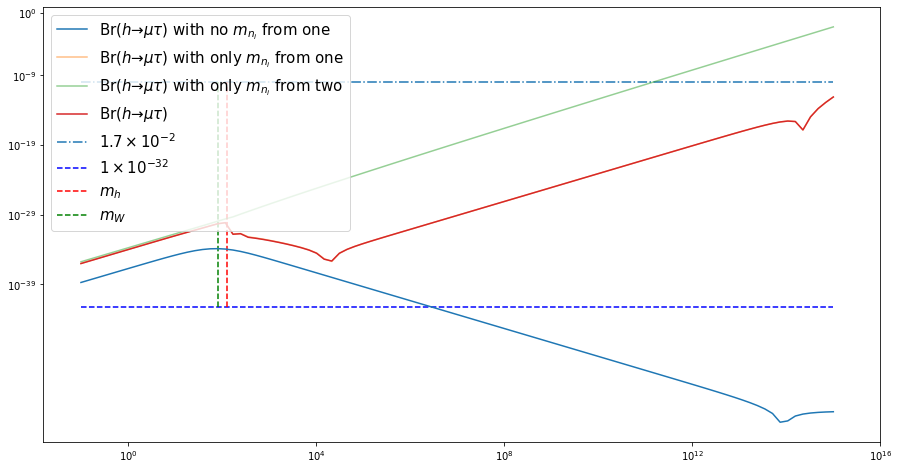

In [71]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(m6np),abs(Γhl2l3_1 #+ YW32
                         /Wtot_1),label=r'Br($h \to \mu \tau$) with no $m_{n_i}$ from one')

plt.loglog(np.real(m6np),abs(Γhl2l3_mni #+ YW32
                         /Wtot_mni),label=r'Br($h \to \mu \tau$) with only $m_{n_i}$ from one',
           alpha=0.5)

plt.loglog(np.real(m6np),abs(Γhl2l3_mni_two #+ YW32
                         /Wtot_mni),label=r'Br($h \to \mu \tau$) with only $m_{n_i}$ from two',
           alpha=0.5)

plt.loglog(np.real(m6np),abs(Γhl2l3 #+ YW32
                         /Wtot),label=r'Br($h \to \mu \tau$)')

#xx = ((YW23 + YW32)/Wtot)[-1]
plt.hlines(1e-10,0.1,1e15,linestyles='-.',label=r'$1.7\times 10^{-2}$')
plt.hlines(5e-43,0.1,1e15,linestyles='--',color='b',label=r'$1\times 10^{-32}$')
plt.vlines(125.1,5e-43,1e-10,linestyles='--',color='r',label=r'$m_h$')
plt.vlines(80.379,5e-43,1e-10,linestyles='--',color='g',label=r'$m_W$')
#plt.xlim(1e-1,1e15)
plt.yticks([1e-39,1e-29,1e-19,1e-9,1])
plt.xticks([1,1e4,1e8,1e12,1e16])
plt.legend(fontsize=15)

In [1]:
import pandas as pd

In [2]:
# WidthSM = 0.0032 #GeV
# Wtot_1 = Γhl2l3_1 + Γhl1l3_1 + Γhl1l2_1 + WidthSM# + YW32 + YW31 + YW21
# Wtot_mni = Γhl2l3_mni + Γhl1l3_mni + Γhl1l2_mni + WidthSM# + YW32 + YW31 + YW21
# Wtot_mni_two = Γhl2l3_mni_two + Γhl1l3_mni_two + Γhl1l2_mni_two + WidthSM# + YW32 + YW31 + YW21

# Wtot = Γhl2l3 + Γhl1l3 + Γhl1l2 + WidthSM# + YW32 + YW31 + YW21
df = pd.DataFrame({
    'm6':m6np,
    'One no mni':Wtot_1,
    'One with mni':Wtot_mni,
    'Two':Wtot_mni_two,
    'Total':Wtot,
    })
df

NameError: name 'm6np' is not defined

In [ ]:
df.to_csv('LFVHD-splitted.txt',sep='\t')

In [3]:
Data = pd.read_csv('LFVHD-splitted.txt',sep='\t',
                     float_precision='round_trip'#importante para mantener la precicion de los números en los archivos.
                    )

In [4]:
Data.keys()

Index(['Unnamed: 0', 'm6', 'One no mni', 'One with mni', 'Two', 'Total'], dtype='object')

In [5]:
convert_to_array = lambda df,col:np.array(list(map(mpmathify,df[col])))

In [ ]:
m6 = convert_to_array(Data,'m6')
Wtot_1 = convert_to_array(Data,'One no mni')
Wtot_mni = convert_to_array(Data,'One with mni')
Wtot_two = convert_to_array(Data,'Two')
Wtot = convert_to_array(Data,'Total')

